In [4]:
import numpy as np
import scipy as sp
def poincare_map_solve_ivp(harmonic_oscillator, 
                           initial_conditions, dir, step, t_span):
    # Tolerance settings for the ODE solver
    abs_tol = 1e-13
    rel_tol = 1e-13

    # Procedure to compute when the x-axis is crossed
    # for the first time
    product = 1
    time = 0
    startPoint = np.array(initial_conditions)
    startPoint = startPoint 

    while product >= 0:
        solution = sp.integrate.solve_ivp(harmonic_oscillator, t_span, 
                                          initial_conditions, method='RK45', 
                                          rtol=rel_tol, atol=abs_tol, 
                                          t_eval=np.linspace(t_span[0], 
                                                             t_span[1], 1000))
        Y = solution.y.T  # Transposing to match previous structure
        product = Y[1, 1] * Y[-1, 1] # in order to enshure crossing the x-axis, 
        #and getting the right sign, dont start at the first index in the list
        initial_conditions = [Y[-1, 0], Y[-1, 1]]
        t_span = [t_span[0]  + dir * step, t_span[1] + dir * step]
        #t_span = [t_span[0], t_span[1] + dir * step]
        time += step*dir

    # Procedure to compute the exact time of the crossing
    for i in range(100):
        t_eval = np.linspace(0, time, 1000)
        solution = sp.integrate.solve_ivp(harmonic_oscillator, [0, time], 
                                          startPoint, method='RK45', 
                                          rtol=rel_tol, atol=abs_tol, 
                                          t_eval=t_eval)
        Y = solution.y.T
        scalar_product = -Y[-1, 0]
        difference = Y[-1, 1] / scalar_product
        time -= difference
        if abs(difference) < 1e-12:
            break

    TimeDuration = time
    newInitial = [Y[-1, 0], Y[-1, 1]]

    return newInitial, TimeDuration

In [6]:
def harmonic_oscillator(t, X):
    #print(f"t: {t}, Y: {Y}")
    return [X[1], -X[0]]

# Initial conditions: xval=0, yval=1
initial_conditions = [0, 1]
overallTime = 0

# Set other parameters
dir = 1
step = 0.3
t_span = [0, dir * step]

# Number of crossings and overall time initialization
numberOfCrossings = 6

# Compute the PoincareMap three times
for i in range(numberOfCrossings):
    newInitial, timeDuration = poincare_map_solve_ivp(harmonic_oscillator, 
                                                      initial_conditions, 
                                                      dir, step, t_span)
    initial_conditions = newInitial
    overallTime += timeDuration
    # Print overall time pretty
    print("The overall time is:", overallTime,
          " The error is:", 0.5 * np.pi + i*np.pi - overallTime)

The overall time is: 1.5707963267948954  The error is: 1.1102230246251565e-15
The overall time is: 4.712388980384686  The error is: 3.552713678800501e-15
The overall time is: 7.853981633974477  The error is: 6.217248937900877e-15
The overall time is: 10.995574287564267  The error is: 8.881784197001252e-15
The overall time is: 14.137166941154057  The error is: 1.2434497875801753e-14
The overall time is: 17.278759594743846  The error is: 1.4210854715202004e-14


In [7]:
def harmonic_oscillator(t, X):
    return [X[1], -X[0]]

# Initial conditions: 90 degrees, 0 degrees and 60 degrees
initial_conditions_lst = [[0, 1], [1, 0], [1/2, np.sqrt(3)/2]]
expected_time_lst = [0.5 * np.pi, np.pi, np.pi/3]

# Set other parameters
dir = 1
step = 0.3
t_span = [0, dir * step]

# Number of crossings and overall time initialization
numberOfCrossings = 2

# Compute the PoincareMap three times
for i in range(len(initial_conditions_lst)):
    initial_conditions = initial_conditions_lst[i]
    overallTime = 0
    for j in range(numberOfCrossings):
        newInitial, timeDuration = poincare_map_solve_ivp(harmonic_oscillator, 
                                                        initial_conditions, 
                                                        dir, step, t_span)
        initial_conditions = newInitial
        overallTime += timeDuration
        # Print overall time pretty
        print(f"The time for initial conditions {initial_conditions_lst[i]} is {overallTime} \n and the error is {expected_time_lst[i] + j*np.pi - overallTime}")



The time for initial conditions [0, 1] is 1.5707963267948954 
 and the error is 1.1102230246251565e-15
The time for initial conditions [0, 1] is 4.712388980384686 
 and the error is 3.552713678800501e-15
The time for initial conditions [1, 0] is 3.1415926535897905 
 and the error is 2.6645352591003757e-15
The time for initial conditions [1, 0] is 6.283185307179581 
 and the error is 5.329070518200751e-15
The time for initial conditions [0.5, 0.8660254037844386] is 1.0471975511965972 
 and the error is 4.440892098500626e-16
The time for initial conditions [0.5, 0.8660254037844386] is 4.188790204786388 
 and the error is 2.6645352591003757e-15


In [8]:
def harmonic_oscillator(t, X):
    return [X[1], -X[0]]

# Initial conditions: 90 degrees, 0 degrees and 60 degrees
initial_conditions_lst = [[0, 1]]
expected_time_lst = [0.5 * np.pi]

# Set other parameters
dir = -1
step = 0.3
t_span = [0, dir * step]

# Number of crossings and overall time initialization
numberOfCrossings = 2

# Compute the PoincareMap three times
for i in range(len(initial_conditions_lst)):
    initial_conditions = initial_conditions_lst[i]
    overallTime = 0
    for j in range(numberOfCrossings):
        newInitial, timeDuration = poincare_map_solve_ivp(harmonic_oscillator, 
                                                        initial_conditions, 
                                                        dir, step, t_span)
        initial_conditions = newInitial
        overallTime += timeDuration
        # Print overall time pretty
    print(f"The time for initial conditions {initial_conditions_lst[i]} is {overallTime} \n and the time error is {expected_time_lst[i] + j*np.pi - abs(overallTime)}")
    print(f"The final crossing point is {newInitial}")
    print(f"The error of the final crossing is [{abs(newInitial[0])-1}, {newInitial[1]}]")



The time for initial conditions [0, 1] is -4.712388980384686 
 and the time error is 3.552713678800501e-15
The final crossing point is [0.9999999999998098, 1.0430024899310553e-16]
The error of the final crossing is [-1.9018120411828932e-13, 1.0430024899310553e-16]


100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


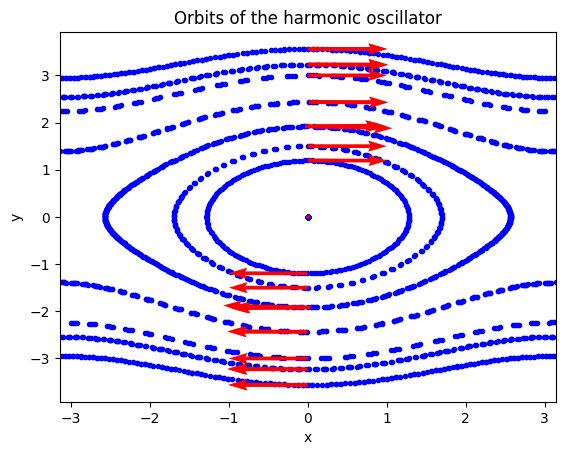

In [9]:
import matplotlib.pyplot as plt
from tqdm import tqdm # for debugging

number_of_points = 5
xval = np.linspace(-10, 10,number_of_points)
yval = np.linspace(-3,3, number_of_points)

# define the harmonic oscillator 
def harmonic_oscillator(t, Y):
    return [Y[1], -np.sin(Y[0])]

# Time span for the integration
t_span = [0, 10]

# Tolerance settings for the ODE solver
abs_tol = 1e-13
rel_tol = 1e-13

# To color the arrows according to the velocity
"""cmap = plt.cm.jet
from matplotlib import colors
norm = colors.Normalize(vmin=0, vmax=1)"""


# Compute the orbit for each initial condition
for x0 in tqdm(xval):
    for y0 in yval:
        initial_conditions = [x0, y0]
        t = np.linspace(t_span[0], t_span[1], 100)
        Y = sp.integrate.solve_ivp(harmonic_oscillator, 
                                   t_span, initial_conditions, 
                                   method='RK45', rtol=rel_tol, 
                                   atol=abs_tol, t_eval=t).y.T
        # Map the orbit to -pi < x < pi
        Y[:, 0] = np.mod(Y[:, 0] + np.pi, 2 * np.pi) - np.pi
        # Plot the orbit
        plt.plot(Y[:, 0], Y[:, 1], 'b.', zorder=1)
        
        ### Plot the direction of the flow at each point on the line x = 0

        # Find the point closest to x = 0
        idx_closest = np.argmin(np.abs(Y[:, 0]))
        # Evaluate the differential equation at that point to get the direction
        dy = harmonic_oscillator(0, Y[idx_closest])
        # Normalize the direction for better visualization
        norm = np.linalg.norm(dy)
        if norm != 0:
            dy = [d/norm for d in dy]
        # Color the arrows according to the velocity
        #color = cmap(norm)
        # Plot the direction at the point closest to x = 0
        plt.quiver(Y[idx_closest, 0], Y[idx_closest, 1], dy[0], 
                   dy[1], angles='xy', scale_units='xy', scale=1, 
                   color="red", zorder=2)

# Making the plot look nice
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-np.pi, np.pi])
plt.title('Orbits of the harmonic oscillator')
plt.show()

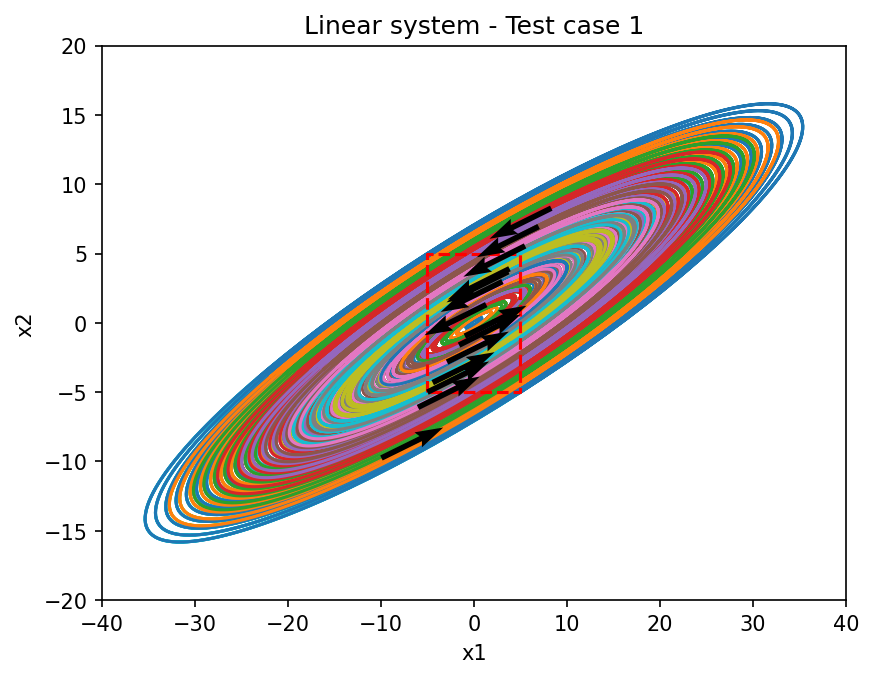

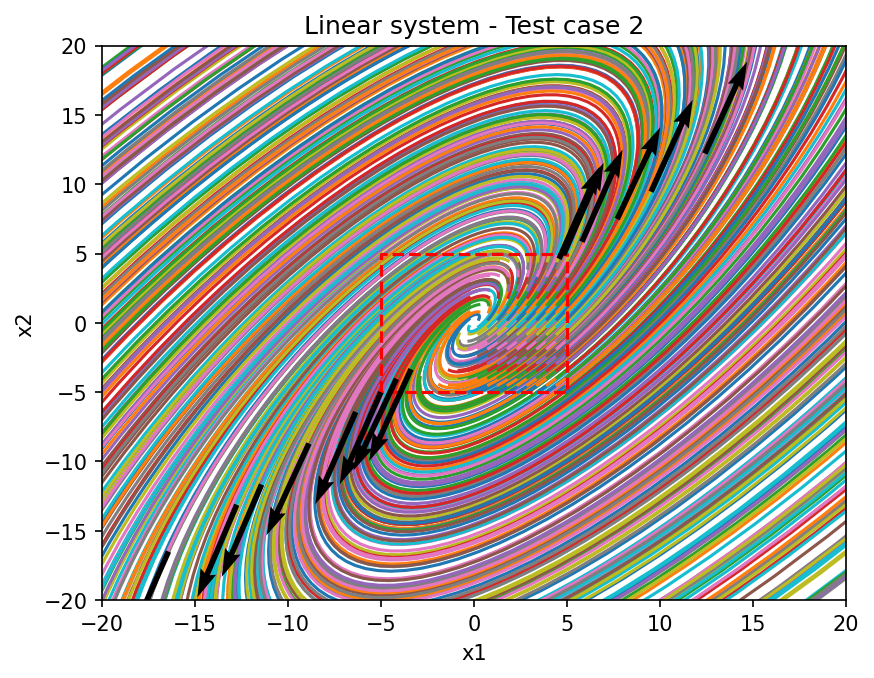

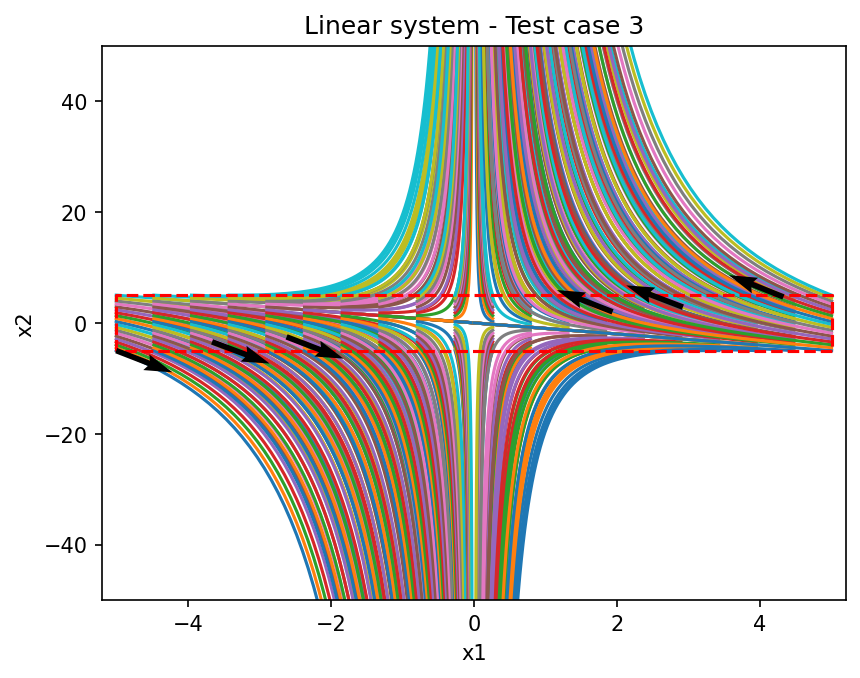

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Coefficients
C = np.array([
    [2, -5, 1, -2],
    [3, -2, 4, -1],
    [-1, 0, 3, 2]
])

t_span = (0, 10)
rel_tol = 1e-6
abs_tol = 1e-6

generator = [5, 5]
number_of_points = 20

# Create arrays of initial conditions for x and y
x_initial_conditions = np.linspace(-generator[0], generator[1], number_of_points)
y_initial_conditions = np.linspace(-generator[0], generator[1], number_of_points)


# The axes for the plots
axes = [[-40, 40, -20, 20], [-20, 20, -20, 20], [-5.2, 5.2, -50, 50]]

# Arrow lengths
arrow_length = [7, 7, 4]

# Function to get the point closest to the line x=y from a trajectory
def get_point_closest_to_line_x_equals_y(X):
    # Get the absolute difference between x and y for each point in the trajectory
    differences = np.abs(X[0] - X[1])
    min_difference = np.min(differences)
    # Return the index of the point with the smallest difference, i.e. the 
    # point closest to the line x=y given the threshold
    if min_difference <= 0.5:
        return np.argmin(differences)
    else:
        return None

for i, coef in enumerate(C):
    plt.figure()
    plt.axis(axes[i])
    
    # Define the system using the current coefficients
    def system(t, X):
        return [
            coef[0] * X[0] + coef[1] * X[1],
            coef[2] * X[0] + coef[3] * X[1]
        ]
    
    counter = 0
    
    # Plot the linear system for each combination of x and y initial conditions
    for x_initial_condition in x_initial_conditions:
        for y_initial_condition in y_initial_conditions:
            initial_conditions = [x_initial_condition, y_initial_condition]
            sol = solve_ivp(system, t_span, initial_conditions, rtol=rel_tol, 
                            atol=abs_tol, t_eval=np.linspace(t_span[0], 
                                                             t_span[1], 300))
            plt.plot(sol.y[0], sol.y[1])
            # If this trajectory is one of the 1/10 chosen for arrow plotting
            if counter % 29 == 0:
                # Get the point closest to the line x=y
                idx_closest = get_point_closest_to_line_x_equals_y(sol.y)
                
                if idx_closest is not None:
                    # Evaluate the differential equation at that point to get the direction
                    dy = system(0, sol.y[:, idx_closest])
                    # Normalize the direction for better visualization
                    norm = np.linalg.norm(dy)
                    if norm != 0:
                        dy = [arrow_length[i]*d/norm for d in dy]
                    # Plot the direction at the point closest to x=y using quiver
                    plt.quiver(sol.y[0, idx_closest], sol.y[1, idx_closest], dy[0], 
                               dy[1], angles='xy', scale_units='xy', scale=1, 
                               color='black', zorder=3)
            counter += 1
    plt.gcf().set_dpi(150)
    
    # Draw a box around the origin, -generator[0] < x < generator[0], -generator[1] < y < generator[1]
    plt.plot([-generator[0], -generator[0], generator[0], generator[0], -generator[0]],
              [-generator[1], generator[1], generator[1], -generator[1], -generator[1]], 
              'r--', zorder=2)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Linear system - Test case {i+1}')
    plt.show()


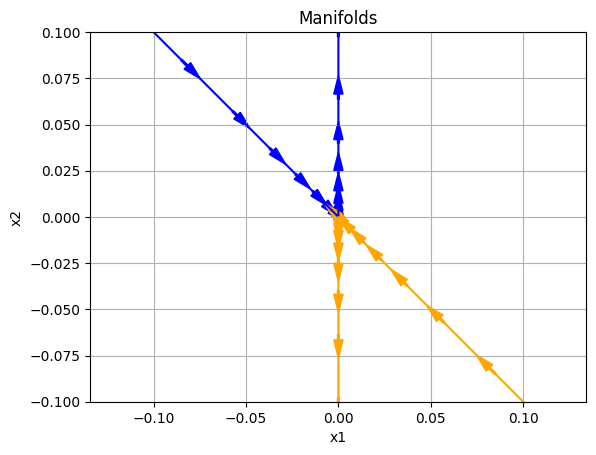

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Manifolds
t_span = [0, 50]
v1 = np.array([0, 1])
v2 = np.array([0.7071, -0.7071])
s = -1

def System(t, X):
    return [-1 * X[0] + 0 * X[1], 3 * X[0] + 2 * X[1]]

def plot_trajectory_with_arrows(ax, x, y, color='blue'):
    ax.plot(x, y, color=color)
    num_arrows = len(x) // 20  
    for i in range(num_arrows):
        idx = i * 10
        ax.arrow(x[idx], y[idx], x[idx+1]-x[idx], y[idx+1]-y[idx],
                 head_width=0.005, head_length=0.01, fc=color, ec=color)

fig, ax = plt.subplots()

# First initial condition
initial_conditions = s * v2
sol = solve_ivp(System, t_span, initial_conditions, rtol=1e-14, atol=1e-11)
plot_trajectory_with_arrows(ax, sol.y[0], sol.y[1])

# Second initial condition
initial_conditions = (-s) * v2
sol = solve_ivp(System, t_span, initial_conditions, rtol=1e-14, atol=1e-11)
plot_trajectory_with_arrows(ax, sol.y[0], sol.y[1], color='orange')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Manifolds')
ax.axis('equal')
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])
ax.grid(True)
plt.show()


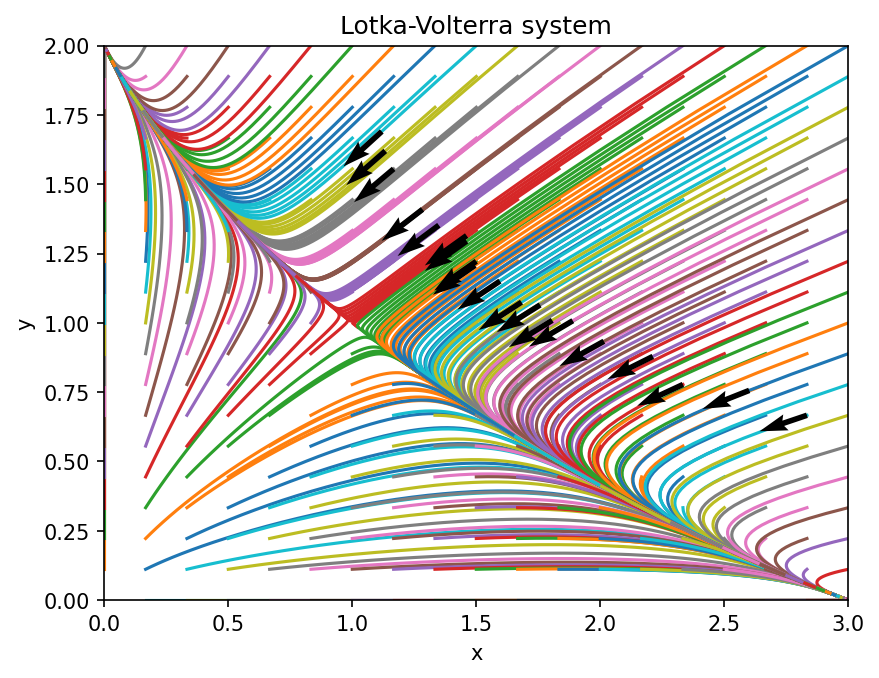

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

number_of_points = 19

# Initial conditions
x_initial_conditions = np.linspace(0, 3, number_of_points)
y_initial_conditions = np.linspace(0, 2, number_of_points)

t_span = (0, 5)
rel_tol = 1e-6
abs_tol = 1e-11

plt.figure()
plt.axis([0, 3, 0, 2])

# Define the Lotka-Volterra system
def system(t, X):
    return [
        X[0] * (3 - X[0] - 2 * X[1]),
        X[1] * (2 - X[0] - X[1])
    ]

def get_point_closest_to_circle(X, center=(3,3), radius=2.3):
    # Compute the distance of each point in the trajectory to the circle's center
    distances_to_center = np.sqrt((X[0] - center[0])**2 + (X[1] - center[1])**2)
    # Compute the absolute difference between each distance and the radius
    differences = np.abs(distances_to_center - radius)
    # Return the index of the point with the smallest difference
    min_difference = np.min(differences)
    # Return the index of the point with the smallest difference, i.e. 
    # the point closest to the line x=y given the threshold
    if min_difference <= 0.05:
        return np.argmin(differences)
    else:
        return None

counter = 0

# Iterate over initial conditions and plot trajectories
for x_initial_condition in x_initial_conditions:
    for y_initial_condition in y_initial_conditions:
        initial_conditions = [x_initial_condition, y_initial_condition]
        sol = solve_ivp(system, t_span, initial_conditions, rtol=rel_tol, 
                        atol=abs_tol, t_eval=np.linspace(t_span[0], t_span[1], 100))
        plt.plot(sol.y[0], sol.y[1])

        if counter % 7 == 0:
            # Get the point closest to the circle
            idx_closest = get_point_closest_to_circle(sol.y)
            
            if idx_closest is not None:
                # Evaluate the differential equation at that point to get the direction
                dy = system(0, sol.y[:, idx_closest])
                
                # Normalize the direction for better visualization
                norm = np.linalg.norm(dy)
                if norm != 0:
                    dy = [0.2*d/norm for d in dy]
                
                # Plot the direction at the point closest to the circle using quiver
                plt.quiver(sol.y[0, idx_closest], sol.y[1, idx_closest], dy[0], 
                           dy[1], angles='xy', scale_units='xy', scale=1, 
                           color='black', zorder=3)

        plt.gcf().set_dpi(150)
        counter += 1

# making the plot look nice
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lotka-Volterra system')

plt.show()


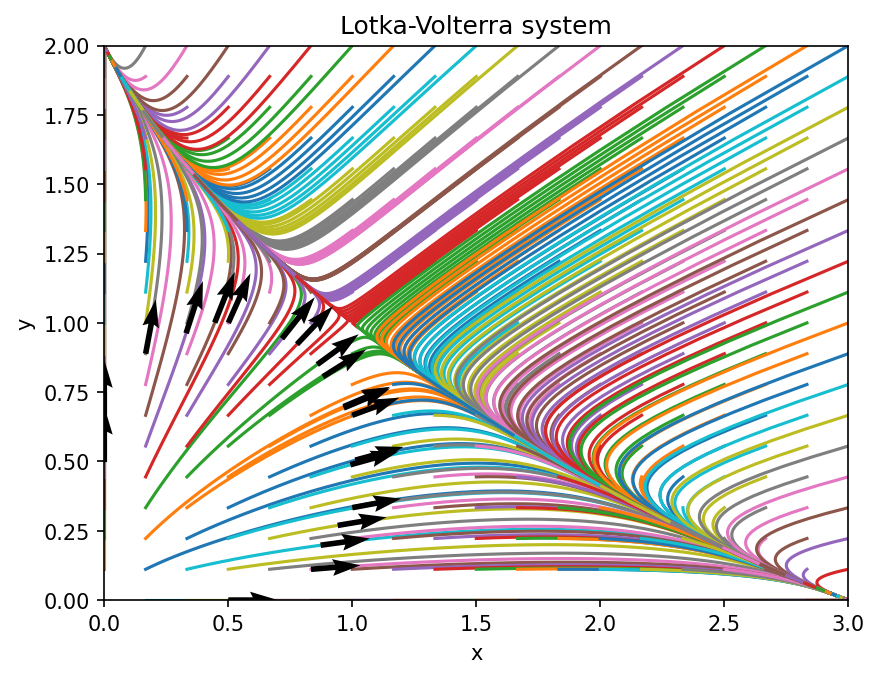

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

number_of_points = 19

# Initial conditions
x_initial_conditions = np.linspace(0, 3, number_of_points)
y_initial_conditions = np.linspace(0, 2, number_of_points)

t_span = (0, 5)
rel_tol = 1e-6
abs_tol = 1e-11

plt.figure()
plt.axis([0, 3, 0, 2])

# Define the Lotka-Volterra system
def system(t, X):
    return [
        X[0] * (3 - X[0] - 2 * X[1]),
        X[1] * (2 - X[0] - X[1])
    ]

def get_point_closest_to_circle(X, center=(0.5,0.5), radius=0.5):
    # Compute the distance of each point in the trajectory to the circle's center
    distances_to_center = np.sqrt((X[0] - center[0])**2 + (X[1] - center[1])**2)
    # Compute the absolute difference between each distance and the radius
    differences = np.abs(distances_to_center - radius)
    # Return the index of the point with the smallest difference
    min_difference = np.min(differences)
    # Return the index of the point with the smallest difference, i.e. 
    # the point closest to the line x=y given the threshold
    if min_difference <= 0.05:
        return np.argmin(differences)
    else:
        return None

counter = 0

# Iterate over initial conditions and plot trajectories
for x_initial_condition in x_initial_conditions:
    for y_initial_condition in y_initial_conditions:
        initial_conditions = [x_initial_condition, y_initial_condition]
        sol = solve_ivp(system, t_span, initial_conditions, rtol=rel_tol, 
                        atol=abs_tol, t_eval=np.linspace(t_span[0], 
                                                         t_span[1], 100))
        plt.plot(sol.y[0], sol.y[1])

        if counter % 3 == 0:
            # Get the point closest to the circle
            idx_closest = get_point_closest_to_circle(sol.y)
            
            if idx_closest is not None:
                # Evaluate the differential equation at that point to get the direction
                dy = system(0, sol.y[:, idx_closest])
                
                # Normalize the direction for better visualization
                norm = np.linalg.norm(dy)
                if norm != 0:
                    dy = [0.2*d/norm for d in dy]
                
                # Plot the direction at the point closest to the circle using quiver
                plt.quiver(sol.y[0, idx_closest], sol.y[1, idx_closest], 
                           dy[0], dy[1], angles='xy', scale_units='xy', 
                           scale=1, color='black', zorder=3)

        plt.gcf().set_dpi(150)
        counter += 1

# making the plot look nice
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lotka-Volterra system')

plt.show()
